# Project for understanding housing price trends and making predictions along
#***POPPING PRICE BY CLICKING ON A PARTICULAR LOCATION ***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Importing Data and Checking out.

In [ ]:
HouseDF = pd.read_csv('housing.csv')  #Load the dataset into a data frame using Pandas

In [ ]:
HouseDF.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# to check if there are any null values

In [ ]:
HouseDF.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# as can be seen there are 207 null values which shall later be removed using KNeighbourRegressor

In [ ]:
HouseDF.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
HouseDF.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Data Imputation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


def input_knn(data_frame=HouseDF):

    """arguments: data_frame:pandas data frame - df default
         returns: data_frame with filled Nan values"""

    numeric_features = HouseDF.select_dtypes(include=[np.number]) #  only features with numeric values
    caterogical_features = HouseDF.select_dtypes(exclude=[np.number])  #  only features without numeric values
    nan_columns = numeric_features.columns[numeric_features.isna().any()].to_list() #  features with empty values (NaNs)
    no_nan_columns = numeric_features.columns.dif ference(nan_columns).values  #  features withouy empty values


    for column in nan_columns:
        imp_test = numeric_features[numeric_features[column].isna()] #  columns with null values
        imp_train = numeric_features.dropna()
        model = KNeighborsRegressor(n_neighbors=5)
        knr = model.fit(imp_train[no_nan_columns], imp_train[column]) #  train model takes values from columns without null values
        numeric_features.loc[HouseDF[column].isna(), column] = knr.predict(imp_test[no_nan_columns]) #  KNR predicts replaces null values

    return pd.concat([numeric_features, caterogical_features], axis=1)

In [ ]:
HouseDF_copy = HouseDF #  even if we have new df inputed with function above it's good practice to save old data frame
HouseDF=input_knn('total_bedrooms') #  imputing data
HouseDF.describe()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.573663,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.411735,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exploratory Data Analysis for House Price Prediction

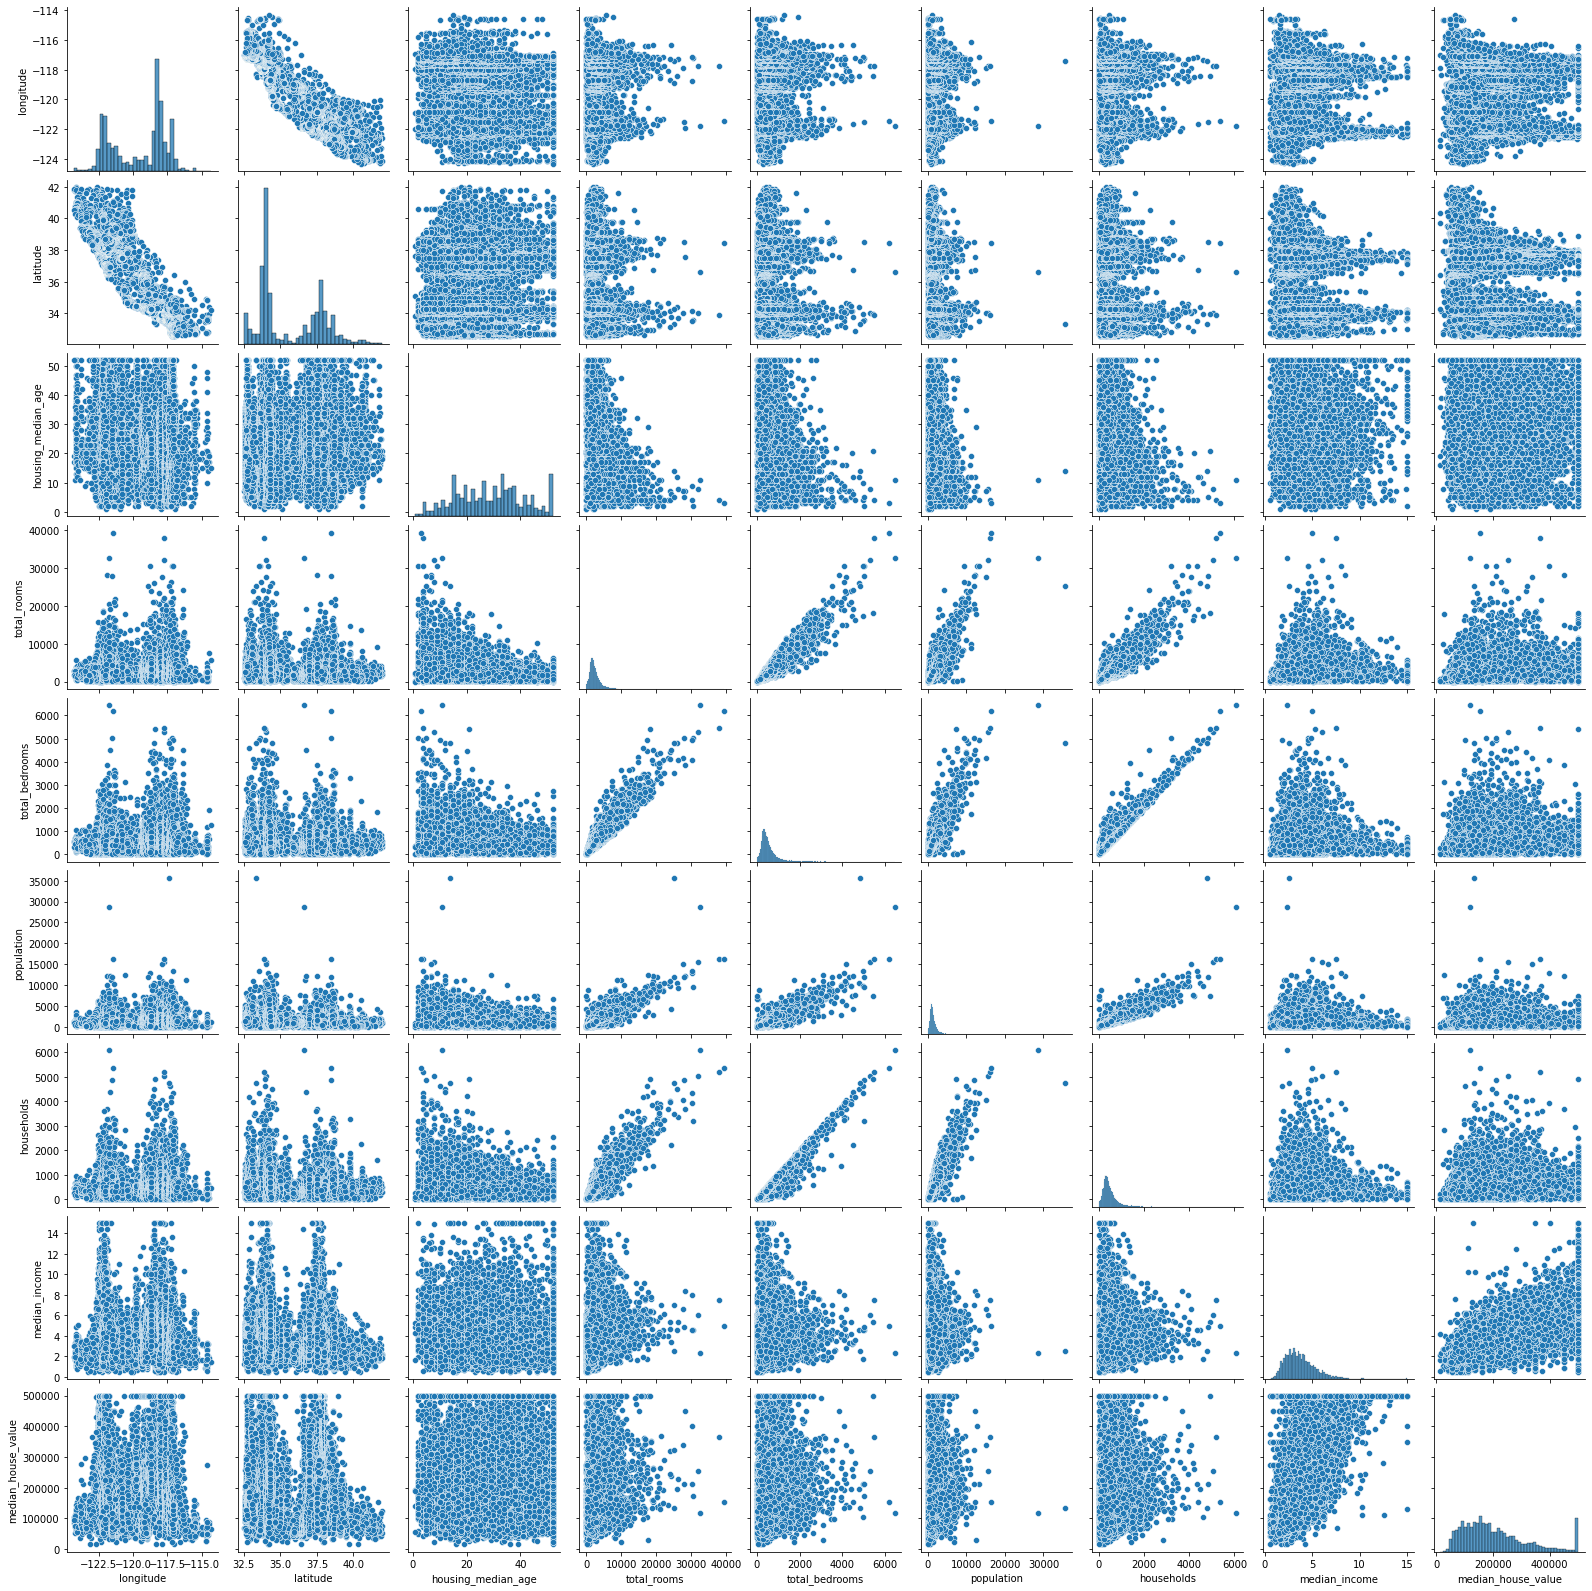

In [ ]:
#Cross Matrix of all Columns to show their relationship to each other

sns.pairplot(HouseDF)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


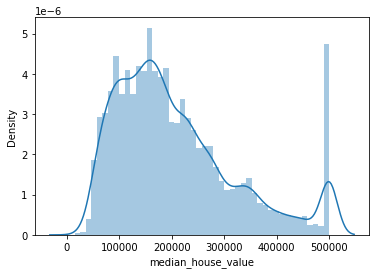

In [ ]:
sns.distplot(HouseDF['median_house_value'])

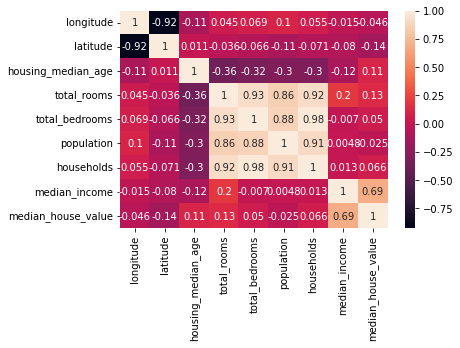

In [ ]:
sns.heatmap(HouseDF.corr(), annot=True) #2D matrix of the ratio of all columns to one another
#Basically shows correlation of the columns

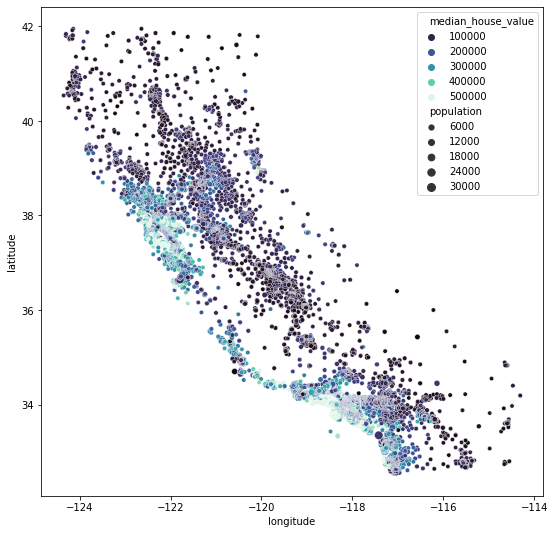

In [ ]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', size='population', data=HouseDF, palette='mako')
plt.show()

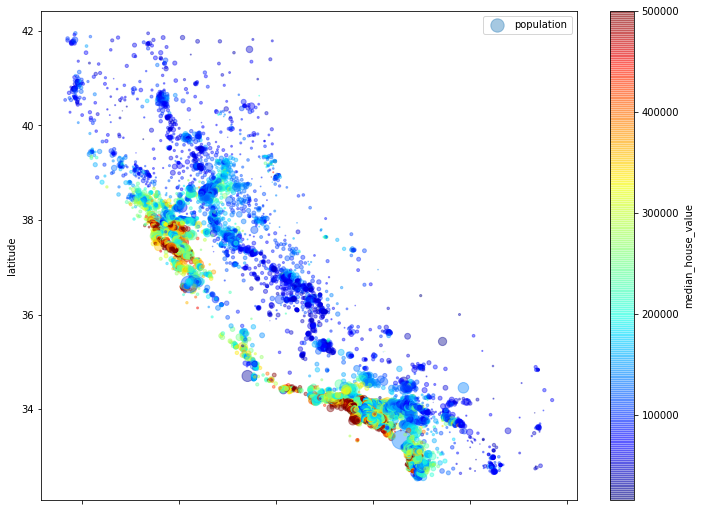

In [ ]:
HouseDF.plot(
kind='scatter',
x='longitude',
y='latitude',
alpha=0.4,
s=HouseDF['population']/100,
label='population',
c='median_house_value',
cmap=plt.get_cmap('jet'),
colorbar=True,
figsize=(12,9))
plt.legend()
plt.show()

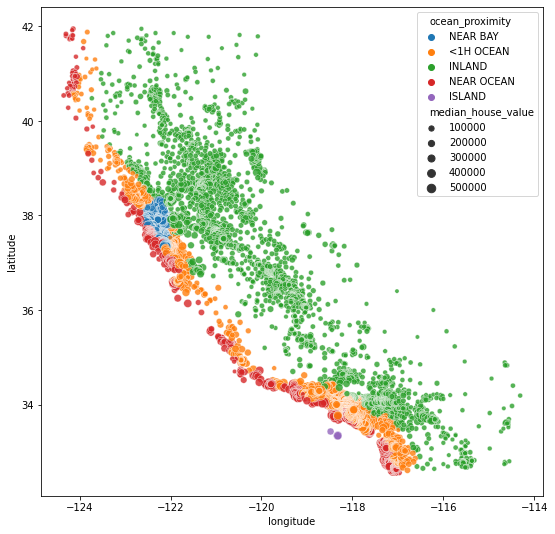

In [ ]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='longitude', y='latitude', hue='ocean_proximity',size = 'median_house_value',  data=HouseDF, alpha=0.8)
plt.show()

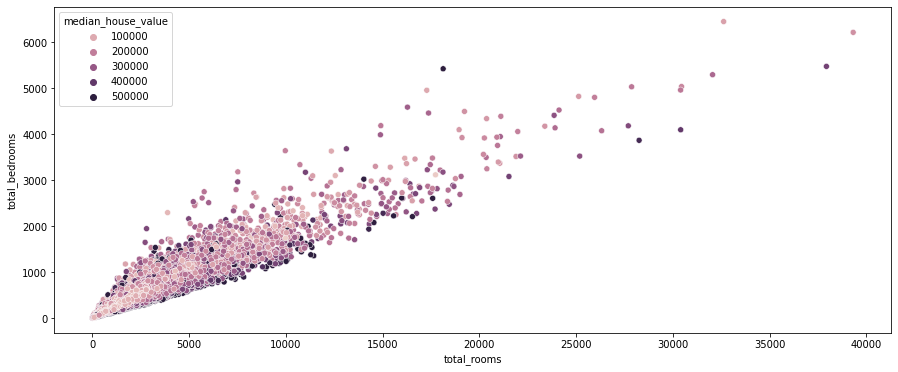

In [ ]:
sns.scatterplot(x=HouseDF['total_rooms'], y=HouseDF['total_bedrooms'], hue=HouseDF['median_house_value'])


## Training a Linear Regression Model

### X and y List

In [ ]:
X = HouseDF[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms',
        'population', 'households', 'median_income']]

y = HouseDF['median_house_value']

# Split Data into Train , Test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the LinearRegression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

## LinearRegression Model Evaluation

In [ ]:
print(lm.intercept_)

-3673368.181668455


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df
#For each variable: ceteris e paribus, 1 unit increase in the variable cause magnitude(Coefficient) increase in price

,Coefficient
longitude,-43828.488266
latitude,-43658.352010
housing_median_age,1175.525065
total_rooms,-6.043715
total_bedrooms,97.864513
population,-45.073951
households,70.868861
median_income,39546.498843


## Predictions from our Linear Regression Model

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
print(f'actual: {y_test.mean()}') #Actual Mean
print(f'predictions: {predictions.mean()}')#Predicted Mean

actual: 206937.78960755814
predictions: 205124.00070671702


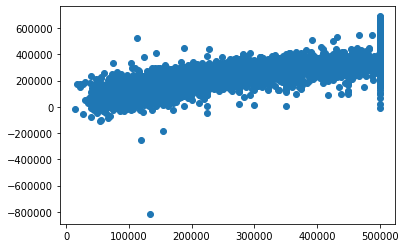

In [ ]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data is in line shape, which means our model has done good predictions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


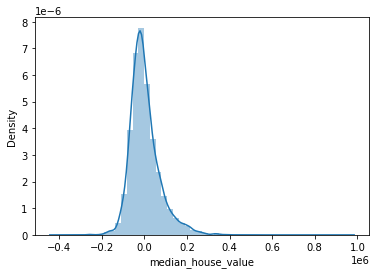

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 51580.17086353537
MSE: 5086906327.873564
RMSE: 71322.55132756794


## Training and Testing various models together

In [ ]:
#importing packages for ML
from sklearn.metrics import r2_score

from sklearn import tree, linear_model, ensemble, neighbors

In [ ]:
MLA_compare = pd.DataFrame()

def MLA_testing(MLA, X_train, X_test):
    row_index = 0
    for classifier in MLA:
        classifier.fit(X_train, y_train)

        y_pred = classifier.predict(X_test)
        classifier_r2_score = r2_score(y_test, y_pred)

        MLA_name = classifier.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'R^2 Score'] = classifier_r2_score*100

        print(MLA_name, "Done")
        row_index+=1

In [ ]:
MLA = [
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),

    linear_model.LinearRegression(),
    linear_model.SGDRegressor(),

    ensemble.RandomForestRegressor(),
    ensemble.AdaBoostRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),

    neighbors.KNeighborsRegressor(),
]

In [ ]:
MLA_testing(MLA=MLA, X_train=X_train, X_test=X_test)

DecisionTreeRegressor Done
ExtraTreeRegressor Done
LinearRegression Done
SGDRegressor Done
RandomForestRegressor Done
AdaBoostRegressor Done
ExtraTreesRegressor Done
GradientBoostingRegressor Done
KNeighborsRegressor Done


### Comparing Different Machine Learning Algorithms for Predictions based on Coefficient of Determination (r2_score)

In [ ]:
MLA_compare = MLA_compare.sort_values(by="R^2 Score", ascending=False).reset_index(drop=True)[:5]
MLA_compare

,MLA Name,R^2 Score
0,RandomForestRegressor,79.757838
1,ExtraTreesRegressor,77.679032
2,GradientBoostingRegressor,76.166390
3,LinearRegression,62.136678
4,DecisionTreeRegressor,61.021419


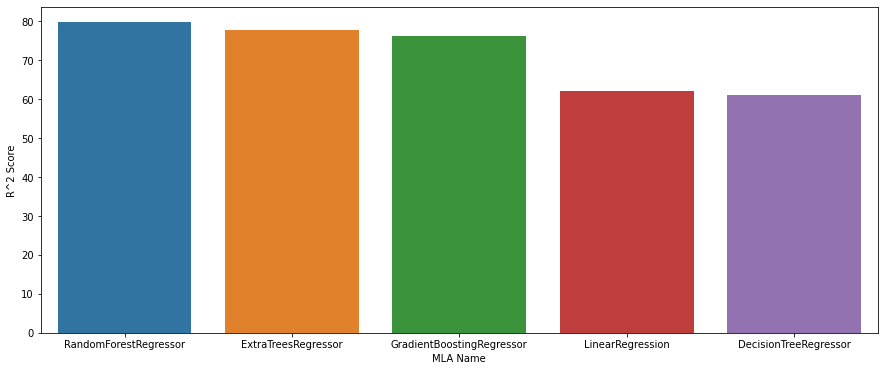

In [ ]:
plt.rcParams["figure.figsize"] = (15, 6)
sns.barplot(x="MLA Name", y="R^2 Score",data=MLA_compare)
plt.show("Comparing R^2 scores of Models")
plt.show()

**PLOTING MAP AND SHOWING AVERAGE PRICE**

In [ ]:
import pandas as pd
import folium

In [ ]:
location = "housing.csv"
bike_station_locations = pd.read_csv(location)
x = bike_station_locations.head(20)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
bike_station_locations = bike_station_locations[["latitude", "longitude", "median_house_value"]]

In [ ]:
map = folium.Map(location=[x.latitude.mean(), x.longitude.mean()], zoom_start=14, control_scale=True)
map

In [ ]:
for index, location_info in x.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["median_house_value"]).add_to(map)
map